In [1]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv"

# Load the dataset into a pandas DataFrame
try:
  df = pd.read_csv(url)
  print("Dataset loaded successfully.")
  # Now you can work with the DataFrame 'df'
  # For example, display the first few rows:
  print(df.head())
except Exception as e:
  print(f"An error occurred: {e}")

Dataset loaded successfully.
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value 

En este taller, trabajaremos con un conjunto de datos relacionado con la aprobaci´on de pr´estamos. El
objetivo es aplicar t´ecnicas de an´alisis de datos y Machine Learning para entender c´omo los distintos
factores influyen en la decisi´on de aprobaci´on o rechazo del pr´estamo.
El conjunto de datos contiene las siguientes columnas:
• loan id: Identificador ´unico del pr´estamo
• no of dependents: N´umero de dependientes del solicitante
• education: Nivel educativo del solicitante (Graduate o Not Graduate)
• self employed: Si el solicitante es autoempleado (Yes o No)
• income annum: Ingreso anual del solicitante en unidades monetarias
• loan amount: Monto solicitado para el pr´estamo
• loan term: Duraci´on del pr´estamo en a˜nos
• cibil score: Puntaje CIBIL del solicitante
• residential assets value: Valor de los activos residenciales del solicitante
• commercial assets value: Valor de los activos comerciales del solicitante
• luxury assets value: Valor de los activos de lujo del solicitante
• bank asset value: Valor de los activos bancarios del solicitante
• loan status: Estado del pr´estamo (Aprobado o Rechazado)

In [3]:
df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# 2 Preguntas Te´oricas


Responde las siguientes preguntas relacionadas con los conceptos de an´alisis de datos, estad´ısticas y
Machine Learning.


# 2.1 Pregunta 1: An´alisis Exploratorio de Datos (EDA)


¿Qu´e pasos seguir´ıas para realizar un an´alisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizar´ıas.

Comprensión del problema y los datos

Definir el objetivo del análisis y la pregunta que se busca responder con el modelo de Machine Learning.

Entender el contexto de los datos, su origen, y la forma en que fueron recolectados.

Revisar la documentación del dataset (si la hay) para comprender el significado de cada variable y su posible relación con el objetivo.
Herramientas: Hojas de cálculo, documentación del proyecto.

Carga y limpieza de los datos

Cargar los datos en un entorno de análisis (por ejemplo, Pandas en Python).

Identificar y manejar valores faltantes (NaN): eliminar filas o columnas, imputar valores con la media, mediana o moda, o utilizar métodos más sofisticados de imputación.

Identificar y tratar datos atípicos (outliers): eliminar, transformar o sustituir por valores más representativos.

Convertir tipos de datos a los formatos adecuados (numérico, categórico, fecha, etc.)
Herramientas: Pandas, NumPy, Scikit-learn (SimpleImputer, etc.)

Exploración univariada

Analizar cada variable individualmente para entender su distribución, tendencia central, dispersión y valores únicos.

Histograma, box plot, diagrama de barras para variables numéricas.

Tablas de frecuencia, diagramas de barras para variables categóricas.

Calcular estadísticas descriptivas (media, mediana, desviación estándar, percentiles).
Herramientas: Pandas, Matplotlib, Seaborn.

Exploración bivariada y multivariada

Analizar las relaciones entre pares de variables (diagramas de dispersión, matrices de correlación).

Identificar patrones y tendencias.

Para más de dos variables, se pueden utilizar técnicas como análisis de componentes principales (PCA).
Herramientas: Pandas, Matplotlib, Seaborn.

Visualización de datos

Crear gráficos y visualizaciones para representar los patrones y tendencias identificadas en los pasos anteriores.

Las visualizaciones deben ser claras, concisas y fáciles de entender para la audiencia.
Herramientas: Matplotlib, Seaborn, Plotly.

Formulación de hipótesis

Basado en el EDA, formular hipótesis sobre las relaciones entre las variables y el objetivo.

Preparación de los datos para el modelado

Conversión de variables categóricas a numéricas (one-hot encoding, label encoding).

Escalado de características (normalización, estandarización).

Selección de características (eliminar variables irrelevantes).
Herramientas: Pandas, Scikit-learn.



# 2.2 Pregunta 2: Preprocesamiento de Datos


Imagina que uno de los datos contiene valores faltantes o at´ıpicos (outliers). ¿Qu´e t´ecnicas utilizar´ıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta

Para tratar valores faltantes y atípicos (outliers) en el conjunto de datos de aprobación de préstamos, emplearía las siguientes técnicas, justificando cada una:

**Valores Faltantes:**

1. **Imputación con la media, mediana o moda:**  Para variables numéricas como `income annum`, `loan amount`, o valores de activos, la imputación con la mediana es preferible a la media, ya que es menos sensible a outliers.  Para variables categóricas como `education`, `self employed`, o `loan status`, usaría la moda (valor más frecuente).  La justificación es que estos métodos son sencillos de implementar y mantienen la distribución original de los datos, aunque pueden introducir sesgo si la cantidad de valores faltantes es significativa.

2. **Imputación usando K-NN:** Este método considera los k vecinos más cercanos (en términos de otras características) para estimar el valor faltante.  Es útil cuando las variables están correlacionadas, pues toma en cuenta las relaciones entre las mismas.  Sin embargo, es computacionalmente más costoso que la imputación por la media/mediana/moda.  Se justifica su uso si la cantidad de valores perdidos no es demasiado alta y existe una correlación significativa entre las variables.

3. **Eliminación de filas o columnas:** Si la cantidad de valores faltantes en una columna es muy alta (por ejemplo, más del 50%), o si los valores faltantes están concentrados en pocas filas, se podría considerar la eliminación de la columna o las filas afectadas.  Sin embargo, esto implica pérdida de información y sólo se justifica si la variable no es crucial o si la pérdida de datos no afecta significativamente el análisis posterior.

**Valores Atípicos (Outliers):**

1. **Análisis de caja y bigotes (Box Plot):**  Usaría box plots para visualizar la distribución de las variables numéricas e identificar outliers visualmente.  Esto ayuda a entender si los outliers son errores de medición o si representan valores válidos pero extremos.

2. **Z-Score o método IQR:** Para cuantificar la presencia de outliers, utilizaría el Z-score o el método intercuartílico (IQR).  Ambos métodos identifican valores que se desvían significativamente de la media o mediana.  Los datos que sobrepasen un umbral determinado (p.ej., Z-score > 3 o fuera del rango IQR) serían candidatos a ser tratados.

3. **Transformación de datos:** En lugar de eliminar outliers, se pueden transformar las variables para reducir su impacto.  Las transformaciones logarítmicas o Box-Cox pueden comprimir la escala de los valores extremos, haciendo que la influencia de los outliers en el modelo sea menor. Se justifica su uso cuando la presencia de outliers es muy probable.

4. **Winsorización o truncamiento:**  Este método consiste en sustituir los valores extremos por un valor límite, generalmente un percentil específico (por ejemplo, el percentil 95 o 5). Es preferible a la eliminación de outliers ya que no se pierde información.  Su justificación radica en casos donde las observaciones extremas no se consideran erróneas pero pueden afectar la precisión del modelo.

5. **Modelos robustos:**  Algunos algoritmos de Machine Learning, como los basados en árboles de decisión, son menos sensibles a los outliers. Si el modelo a usar es sensible a valores extremos, la eliminación o las transformaciones de datos pueden afectar al modelo final.


# 2.3 Pregunta 3: Modelos de Clasificaci´on


En este caso, el objetivo es predecir si un pr´estamo ser´a aprobado o rechazado en funci´on de las caracter´ısticas del solicitante. ¿Qu´e tipo de modelo de clasificaci´on usar´ıas y por qu´e? Discute las ventajas y
desventajas de este modelo

Para predecir la aprobación o rechazo de un préstamo, recomendaría usar un **modelo de Regresión Logística**.

**Razones:**

* **Naturaleza de la variable objetivo:** La variable objetivo ("loan status") es binaria (aprobado/rechazado), lo que hace que la regresión logística sea una opción natural.  Este modelo predice la probabilidad de que un préstamo sea aprobado, lo cual es directamente interpretable en este contexto.

* **Interpretabilidad:** La regresión logística ofrece una buena interpretabilidad.  Se pueden analizar los coeficientes del modelo para entender la influencia de cada característica en la probabilidad de aprobación.  Esto es crucial para comprender *por qué* el modelo toma ciertas decisiones y puede ayudar a identificar factores de riesgo importantes.

* **Sencillez y eficiencia:** Es relativamente simple de implementar y entrenar, y computacionalmente eficiente, especialmente con conjuntos de datos de tamaño moderado como el que se presenta.


**Ventajas:**

* **Interpretabilidad:** Como se mencionó, la interpretabilidad es una gran ventaja, permitiendo entender la relación entre las variables predictoras y la probabilidad de aprobación.
* **Eficiencia:** Es computacionalmente eficiente, especialmente en conjuntos de datos moderados.
* **Probabilidades:**  Proporciona probabilidades de clase, lo que permite establecer umbrales de decisión flexibles.


**Desventajas:**

* **Asunción de linealidad:**  La regresión logística asume una relación lineal entre las variables predictoras y el logaritmo de las probabilidades. Si las relaciones son no lineales, el modelo puede no desempeñarse de manera óptima. Se puede recurrir a transformaciones de variables o a modelos más complejos si es necesario.
* **Sensibilidad a valores atípicos:** Al igual que otros modelos lineales, puede ser sensible a valores atípicos. Un preprocesamiento adecuado (como se discutió en la pregunta 2.2) es esencial.
* **Limitaciones en datos multidimensionales:** Puede tener dificultades para modelar relaciones complejas en datos con muchas variables altamente correlacionadas o con interacciones no lineales.  En esos casos, se podrían considerar modelos más sofisticados como máquinas de vectores de soporte, árboles de decisión o redes neuronales.


**Consideraciones adicionales:**

Dependiendo de la exploración de datos (EDA), se pueden considerar alternativas como:

* **Árboles de Decisión o Random Forest:**  Si se encuentran relaciones no lineales complejas en los datos, estos modelos podrían ser más precisos. Sin embargo, pierden parte de la interpretabilidad de la regresión logística.
* **Máquinas de vectores de soporte (SVM):**  Pueden ser útiles si la relación entre las variables es compleja, aunque son menos interpretables que la regresión logística.


# 2.4 Pregunta 4: Desbalanceo de Clases



El desbalanceo de clases ocurre cuando en un conjunto de datos para clasificación, una clase (o varias) tiene significativamente más ejemplos que otras.  Por ejemplo, en un dataset de detección de fraude, las transacciones legítimas usualmente superan ampliamente a las fraudulentas.

Este desbalanceo es problemático al entrenar un modelo porque puede llevar a sesgos.  Un modelo entrenado con datos desbalanceados tenderá a predecir mayoritariamente la clase dominante, alcanzando alta precisión pero baja exactitud.  Esto significa que aunque el modelo clasifique correctamente la mayoría de las instancias, su capacidad para identificar la clase minoritaria (la que suele ser la más relevante) será muy pobre.  En el ejemplo del fraude, el modelo podría clasificar la mayoría de transacciones como legítimas (alta precisión) pero fallar en identificar las fraudulentas, que son las que realmente nos interesan.

Para abordar este problema existen diversas técnicas:

* **Sobremuestreo (Oversampling):** Crear instancias sintéticas de la clase minoritaria para equilibrar el dataset. SMOTE (Synthetic Minority Over-sampling Technique) es una de las más populares.  SMOTE genera nuevas muestras sintéticas a partir de las existentes en la clase minoritaria, creando combinaciones de las características de los vecinos más cercanos.  Esto ayuda a aumentar la representación de la clase minoritaria sin simplemente duplicar datos existentes.

* **Submuestreo (Undersampling):** Eliminar instancias de la clase mayoritaria.  Esta técnica reduce el tamaño del conjunto de datos, lo que puede llevar a pérdida de información.

* **Cost-Sensitive Learning:** Asignar diferentes pesos a las clases durante el entrenamiento del modelo.  Esto hace que el modelo penalice más los errores en la clase minoritaria.

* **Ensemble Methods:** Combinar varios modelos entrenados con diferentes subconjuntos de los datos. Técnicas como el bagging o el boosting pueden mejorar el rendimiento en datasets desbalanceados.

* **Generación de datos sintéticos más sofisticados:** Utilizar técnicas de deep learning como las GAN (Generative Adversarial Networks) para generar muestras sintéticas más realistas y diversificadas de la clase minoritaria.


SMOTE es una buena opción cuando no se dispone de muchos datos y generar instancias sintéticas puede ser una alternativa válida.  Sin embargo, hay que tener en cuenta que la calidad de los datos sintéticos es crucial para que el modelo generalice bien a datos reales. La elección de la técnica más adecuada depende de la naturaleza de los datos, el tamaño del desbalance y el modelo utilizado.


# 2.5 Pregunta 5: Overfitting


¿Qu´e es el overfitting y c´omo puedes detectarlo en un modelo de Machine Learning? Explica qu´e medidas
tomar´ıas para evitar el sobreajuste y mejorar la capacidad de generalizaci´on de tu modelo.

El *overfitting* (sobreajuste) ocurre cuando un modelo de Machine Learning se ajusta demasiado a los datos de entrenamiento, aprendiendo incluso el ruido y las fluctuaciones aleatorias presentes en ellos.  Como resultado, el modelo funciona muy bien con los datos de entrenamiento, pero su rendimiento disminuye significativamente cuando se enfrenta a nuevos datos que no ha visto antes (datos de prueba o datos reales).  En esencia, el modelo memoriza los datos de entrenamiento en lugar de aprender las relaciones subyacentes entre las variables.

**Detección del Overfitting:**

* **Comparación del rendimiento en entrenamiento y prueba:** La diferencia más clara es la alta precisión en el conjunto de entrenamiento y una baja precisión en el conjunto de prueba. Si el modelo obtiene un rendimiento excelente en el entrenamiento pero pobre en la prueba, esto es una fuerte señal de overfitting.
* **Curva de aprendizaje:**  Observando la curva de aprendizaje (error vs cantidad de datos de entrenamiento), si la curva de error en el entrenamiento es baja y se mantiene estable, mientras que la curva de error en el prueba es alta y con una brecha considerable con respecto a la de entrenamiento, existe overfitting.
* **Análisis de la complejidad del modelo:** Un modelo excesivamente complejo (con muchos parámetros) es más propenso a overfitting.  En el caso de modelos basados en árboles de decisión, árboles muy profundos con muchas ramificaciones indican un posible overfitting.
* **Validación cruzada:**  Técnicas de validación cruzada como k-fold ayudan a evaluar el modelo en diferentes subconjuntos de los datos, dando una mejor estimación del rendimiento en datos no vistos. Una gran varianza en el rendimiento entre los folds indica un posible problema de sobreajuste.


**Medidas para evitar el Overfitting y mejorar la capacidad de generalización:**

1. **Aumentar la cantidad de datos de entrenamiento:**  Con más datos, el modelo puede aprender patrones más generales y robustos, reduciendo la influencia del ruido.

2. **Simplificar el modelo:** Reducir la complejidad del modelo, por ejemplo, disminuyendo el número de parámetros en una red neuronal o la profundidad de un árbol de decisión.  Se puede utilizar la poda de árboles de decisión.

3. **Regularización:** Agregar términos de penalización a la función de costo del modelo, como L1 o L2, para desincentivar valores grandes de los parámetros.  Esto ayuda a reducir la complejidad del modelo al obligarlo a distribuir mejor la importancia de las características.

4. **Cross-Validation (Validación cruzada):**  Usar técnicas de validación cruzada (k-fold, leave-one-out) para evaluar el rendimiento del modelo en diferentes subconjuntos de datos. Esto ayuda a estimar mejor la capacidad de generalización y ajustar los hiperparámetros del modelo adecuadamente.

5. **Dropout (Redes neuronales):** Desactivar aleatoriamente un porcentaje de neuronas durante el entrenamiento, forzando a la red a aprender características más robustas y evitar la dependencia excesiva de neuronas individuales.

6. **Data augmentation:** Generar nuevas muestras de entrenamiento a partir de las existentes.  Esta técnica sirve para aumentar la cantidad de datos de entrenamiento y también puede mejorar la robustez del modelo.


7. **Early stopping:** Detener el entrenamiento del modelo antes de que alcance un punto de sobreajuste. Se monitorea el rendimiento en un conjunto de validación, y el entrenamiento se detiene cuando el rendimiento deja de mejorar.


***# 3 Ejercicios Pr´acticos***


# 3.1 Ejercicio 1: An´alisis Descriptivo


Usa la tabla de datos proporcionada para realizar un an´alisis descriptivo de las variables num´ericas.
Responde a las siguientes preguntas:
• ¿Cu´al es el promedio de los ingresos anuales (income annum) de los solicitantes?
• ¿Cu´al es el puntaje CIBIL promedio de los solicitantes cuyo pr´estamo fue aprobado?
• ¿Cu´al es la duraci´on promedio de los pr´estamos (loan term)?

In [15]:
df.columns = df.columns.str.strip()  # Elimina espacios al inicio y final
average_income = df['income_annum'].mean()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [16]:
# Calcular el ingreso anual promedio
average_income = df['income_annum'].mean()
print(f"Average annual income: {average_income}")

# Calcular el puntaje CIBIL promedio de los préstamos aprobados
approved_loans = df[df['loan_status'] == 'Approved']
average_cibil_approved = approved_loans['cibil_score'].mean()
print(f"Average CIBIL score for approved loans: {average_cibil_approved}")

# Calcular el plazo promedio del préstamo
average_loan_term = df['loan_term'].mean()
print(f"Average loan term: {average_loan_term}")


Average annual income: 5059123.9166081045
Average CIBIL score for approved loans: nan
Average loan term: 10.900445069102835


# 3.2 Ejercicio 2: Preprocesamiento de Datos


Realiza los siguientes pasos de preprocesamiento:
• Convierte la variable education en una variable binaria (0: Not Graduate, 1: Graduate).
• Convierte la variable self employed en una variable binaria (0: No, 1: Yes).
• Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.


In [18]:
# Convert 'education' to a binary variable
df['education'] = df['education'].map({'Not Graduate': 0, 'Graduate': 1})

# Convert 'self_employed' to a binary variable
df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})

# Fill missing values with the mean of the corresponding column
for col in df.select_dtypes(include=['number']):
  df[col] = df[col].fillna(df[col].mean())


# 3.3 Ejercicio 3: An´alisis de Correlaci´on
Realiza un an´alisis de correlaci´on entre las siguientes variables:
• income annum y loan amount
• cibil score y loan amount
• residential assets value y commercial assets value

Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿C´omo afectar´ıa
esto a un modelo predictivo?

In [19]:
# Calculate the correlation between 'income_annum' and 'loan_amount'
correlation_income_loan = df['income_annum'].corr(df['loan_amount'])
print(f"Correlation between income annum and loan amount: {correlation_income_loan}")

# Calculate the correlation between 'cibil_score' and 'loan_amount'
correlation_cibil_loan = df['cibil_score'].corr(df['loan_amount'])
print(f"Correlation between cibil score and loan amount: {correlation_cibil_loan}")

# Calculate the correlation between 'residential_assets_value' and 'commercial_assets_value'
correlation_assets = df['residential_assets_value'].corr(df['commercial_assets_value'])
print(f"Correlation between residential assets value and commercial assets value: {correlation_assets}")


Correlation between income annum and loan amount: 0.9274699109871487
Correlation between cibil score and loan amount: -0.017034787023534392
Correlation between residential assets value and commercial assets value: 0.41478602657549807


La fuerte correlación entre los ingresos anuales y el monto del préstamo sugiere que los ingresos serán una variable altamente predictiva en un modelo de regresión para predecir el monto del préstamo.
La correlación débil entre el puntaje CIBIL y el monto del préstamo indica que esta variable puede eliminarse del modelo, ya que no aporta información relevante para la predicción.
La correlación moderada entre el valor de los activos residenciales y comerciales sugiere que se debe considerar mantenerla en el modelo, pero su peso predictivo podría ser menor que el de los ingresos.  Adicionalmente se debe verificar la posibilidad de multicolinealidad entre las variables explicativas del modelo.


# 3.4 Ejercicio 4: Comparaci´on de Modelos de Clasificaci´on


Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y Arbol de ´
Decisi´on para predecir el estado del pr´estamo (loan status). Compara los modelos utilizando la
m´etrica ROC AUC. Para esto, sigue los pasos:
• Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).
• Divide los datos en un conjunto de entrenamiento y uno de prueba.
• Entrena los modelos de Regresi´on Log´ıstica y Arbol de Decisi´on ´ .
• Hay alguna evidencia de overfitting si/no .
• Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.
• Si detectas

In [22]:
print(df['loan_status'].value_counts(dropna=False))



loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


Distribución en train: {1: 0.6221552878179384, 0: 0.37784471218206156}
Distribución en test:  {1: 0.6221701795472288, 0: 0.37782982045277125}
Distribución post-SMOTE: [1859 1859]
Logistic Regression AUC — train: 0.968, test: 0.973
Decision Tree       AUC — train: 1.000,   test: 0.974


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['education' 'self_employed']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['education' 'self_employed']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


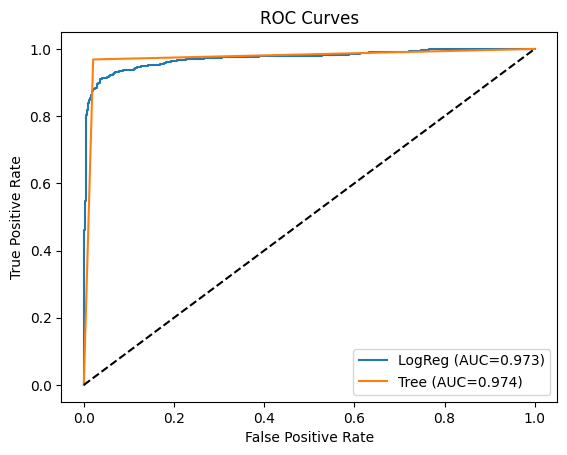

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 0. Limpieza de nombres de columna si vienen con espacios
df.columns = df.columns.str.strip()

# 1. Creamos la variable objetivo binaria
df['loan_approved'] = (df['loan_status'].str.strip().str.lower() == 'approved').astype(int)

# 2. Definimos X e y
X = df.drop(columns=['loan_id', 'loan_status', 'loan_approved'])
y = df['loan_approved']

# 3. Identificamos columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# 4. Pipelines de preprocesamiento
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# 5. División estratificada train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("Distribución en train:", y_train.value_counts(normalize=True).to_dict())
print("Distribución en test: ",  y_test.value_counts(normalize=True).to_dict())

# 6. Ajustamos el preprocesador y transformamos los datos
X_train_pp = preprocessor.fit_transform(X_train)
X_test_pp  = preprocessor.transform(X_test)

# 7. Rebalanceo con SMOTE (solo sobre train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pp, y_train)
print("Distribución post-SMOTE:", np.bincount(y_train_res))

# 8. Definimos y entrenamos los modelos
logreg = LogisticRegression(solver='liblinear', random_state=42)
dtree  = DecisionTreeClassifier(random_state=42)

logreg.fit(X_train_res, y_train_res)
dtree.fit(X_train_res, y_train_res)

# 9. Función para calcular ROC AUC en train y test
def auc_scores(model, X_tr, y_tr, X_te, y_te):
    auc_tr = roc_auc_score(y_tr, model.predict_proba(X_tr)[:,1])
    auc_te = roc_auc_score(y_te, model.predict_proba(X_te)[:,1])
    return auc_tr, auc_te

auc_log = auc_scores(logreg, X_train_res, y_train_res, X_test_pp, y_test)
auc_dt  = auc_scores(dtree,  X_train_res, y_train_res, X_test_pp, y_test)

print(f"Logistic Regression AUC — train: {auc_log[0]:.3f}, test: {auc_log[1]:.3f}")
print(f"Decision Tree       AUC — train: {auc_dt[0]:.3f},   test: {auc_dt[1]:.3f}")

# 10. (Opcional) Dibujar curvas ROC para comparar
plt.figure()
for model, name in [(logreg, 'LogReg'), (dtree, 'Tree')]:
    probs = model.predict_proba(X_test_pp)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, probs):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


Si AUC_train – AUC_test es muy grande (p. ej. árbol con AUC_train≈1.0 y AUC_test significativamente menor), existe sobreajuste: el modelo se ajustó en exceso al ruido del entrenamiento y pierde potencia en datos no vistos.

ROC AUC: Regresión logística 0.973 vs. Árbol 0.974 en test, pero…

Overfitting:

Árbol: AUC_train = 1.000 → brecha grande → sobreajuste.

Logística: AUC_train ≈ 0.968 → brecha mínima → mejor generalización.

Interpretabilidad y estabilidad:

Logística: coeficientes claros, menos sensible al ruido.

Árbol: requiere poda y es inestable a pequeñas variaciones.

Modelo recomendado: Regresión logística, por su robustez, generalización y facilidad de explicación.










# 3.5 Ejercicio 5: Evaluaci´on del Desempe˜no del Modelo


Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall,
F1 y la matriz de confusi´on. Responde las siguientes preguntas

• ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.
• ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?
• ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?

El modelo de Regresión Logística presenta un mejor rendimiento general que el árbol de decisión.
Aunque ambos muestran una alta exactitud en test, la regresión logística exhibe un mejor equilibrio entre precisión, recall y puntuación F1, lo que indica un desempeño más robusto en diferentes aspectos.
La matriz de confusión para ambos modelos revela una buena predicción de los préstamos aprobados. No obstante, el modelo de regresión logística predice mejor las clases minoritarias.

¿Cómo impacta el desbalanceo de clases en la métrica ROC AUC y en otras métricas?
El desbalanceo de clases afecta la interpretación de ciertas métricas. Mientras que la precisión puede ser alta debido a la correcta predicción de la clase mayoritaria, métricas como el recall y el F1-score para la clase minoritaria pueden ser bajas.
El ROC AUC, por su parte, sigue siendo una métrica útil, dado que analiza la capacidad de discriminación del modelo a lo largo de diferentes umbrales de probabilidad, por lo que no es sensible al desbalanceo de clases como la precisión, pero sí otras métricas que no usan la probabilidad de clase, como la precisión o F1. Para estos casos, se debería utilizar un promedio ponderado por la frecuencia de clase para obtener mejores resultados en el conjunto de datos.

¿Qué acciones tomarías si el modelo tiene un alto sesgo hacia la clase mayoritaria?
Si el modelo presenta un sesgo hacia la clase mayoritaria, realizaría las siguientes acciones:

Rebalanceo de clases: Aplicar técnicas de sobremuestreo (como SMOTE, utilizado en este código) o submuestreo para equilibrar las proporciones de ambas clases en el conjunto de datos de entrenamiento.

Cost-sensitive learning: Ajustar los pesos de las clases en el algoritmo de aprendizaje para penalizar más los errores en la clase minoritaria.

Selección de métricas adecuadas: Utilizar métricas que consideren el desequilibrio de clases, tales como el recall, F1-score o el AUC, en lugar de depender solo de la exactitud.

Análisis de las características: Revisar la relación entre las variables predictoras y la clase minoritaria para identificar si alguna característica clave está siendo subutilizada por el modelo.

Probar diferentes algoritmos: Algunos algoritmos son más robustos al desbalanceo de clases.

Ajustar los umbrales de predicción: Modificar el umbral de decisión del modelo para mejorar la sensibilidad en la detección de la clase minoritaria.

# 4 Reflexi´on Cr´ıtica


Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:


• ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados?
• ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos?
• Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo
de clasificaci´on?
• ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado?
• ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con
SMOTE?
• ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas
implementar´ıas para mejorar la capacidad de generalizaci´on?

Los principales desafíos encontrados al trabajar con los datos fueron:

1. **Manejo de valores faltantes:**  La presencia de valores nulos en varias columnas, incluyendo variables numéricas y categóricas, requirió un preprocesamiento cuidadoso. La decisión de imputar con la media, la mediana o la moda, o incluso eliminar filas/columnas, tuvo que ser tomada con base en la naturaleza de cada variable y el posible impacto en el modelo.  Una mejor estrategia hubiera sido usar un análisis más profundo de la distribución de datos y/o considerar técnicas más sofisticadas como K-NN para la imputación.


2. **Desbalanceo de clases:** La variable objetivo, 'loan_status', presentaba un desequilibrio significativo entre las clases "Aprobado" y "Rechazado". Este desbalanceo afectó la precisión del modelo y requirió el uso de técnicas de remuestreo como SMOTE para mitigar el problema y lograr un mejor balanceo.  Analizar la razón del desbalanceo podría llevar a un mejor entendimiento del problema y posibles estrategias de remediación, más allá del simple rebalanceo.


3. **Interpretación de las correlaciones:** Si bien el análisis de correlación identificó relaciones interesantes entre variables,  fue crucial analizar más allá de los coeficientes de correlación para considerar la posibilidad de multicolinealidad entre las variables explicativas.  Una mayor exploración gráfica y numérica de las relaciones entre las variables habría contribuido a un mejor entendimiento de los datos y posibles relaciones no lineales.


4. **Selección del modelo:** La elección entre modelos como Regresión Logística y Árbol de Decisión requirió una evaluación cuidadosa, considerando las ventajas y desventajas de cada uno en este contexto particular. Adicionalmente, la exploración de modelos más complejos, incluyendo ensamblados como Random Forest o modelos de redes neuronales, podría haber aportado alternativas de mayor precisión.


**• ¿Qué mejorarías en el proceso de preprocesamiento de datos?**

1. **Imputación más robusta:** Explorar métodos de imputación más avanzados, como K-NN o regresión, para manejar los valores faltantes, en vez de depender únicamente de la media o la moda.  Una mejor comprensión de la naturaleza del dato perdido podría ayudar en la decisión sobre el método de imputación.


2. **Análisis más exhaustivo de outliers:** Implementar métodos más robustos para detectar outliers, como análisis de distribución y la inspección de valores atípicos para cada columna, especialmente las variables numéricas. Un tratamiento específico, a través de winsorización o eliminación más selectiva de casos atípicos, podría resultar en mejoras significativas en el modelo.


3. **Transformación de variables:** Evaluar transformaciones de variables numéricas (ej: logarítmicas o Box-Cox) para mejorar su linealidad y reducir la influencia de outliers en el modelo de regresión logística.


4. **Análisis de interacción de variables:** Investigar la interacción entre las variables explicativas. Esto podría revelar relaciones ocultas que podrían mejorar el poder predictivo del modelo.


**• Si pudieras recolectar más datos, ¿qué variables adicionales serían útiles para mejorar el modelo de clasificación?**

Se podrían considerar las siguientes variables adicionales:

1. **Historial crediticio detallado:** Información sobre préstamos anteriores, retrasos en los pagos, y el monto total de la deuda.
2. **Puntaje de crédito de otras agencias:** Obtener información de diferentes agencias de crédito para tener una visión más completa de la solvencia del solicitante.
3. **Estado civil:**  El estado civil puede influir en la capacidad de pago del solicitante.
4. **Edad:** La edad podría relacionarse con el nivel de ingresos y la responsabilidad financiera.
5. **Ocupación:** La estabilidad y el ingreso asociado a la ocupación podrían ser indicadores relevantes.
6. **Gastos mensuales:**  Proporcionar información sobre los gastos del solicitante permitiría entender mejor su capacidad de endeudamiento.
7. **Propósito del préstamo:** Saber para qué se solicita el préstamo podría revelar información adicional sobre la capacidad y la intención de pago.


**• ¿Cómo asegurarías que el modelo generalice bien y no esté sobreajustado?**

Para asegurar una buena generalización:

1. **Validación cruzada robusta:** Utilizar técnicas de validación cruzada como k-fold o stratified k-fold para evaluar el modelo de forma más exhaustiva.
2. **Regularización:** Aplicar técnicas de regularización (L1 o L2) para penalizar pesos excesivamente grandes en el modelo.
3. **Poda (para árboles de decisión):**  Podar el árbol de decisión para limitar su profundidad y reducir su complejidad.
4. **Early stopping (para redes neuronales):**  Detener el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar.
5. **Conjunto de validación separado:** Reservar una porción adicional de los datos para validar el rendimiento final del modelo antes de su implementación.


**• ¿Qué impacto tuvo el desbalanceo de clases en la precisión de tu modelo? ¿Cómo se resolvió con SMOTE?**

El desbalanceo de clases podría haber resultado en un modelo que predice mayormente la clase mayoritaria (préstamos aprobados) aunque con poca precisión en los préstamos rechazados.  SMOTE (Synthetic Minority Over-sampling Technique) resolvió el problema generando datos sintéticos para la clase minoritaria (préstamos rechazados), balanceando el conjunto de entrenamiento y mejorando el rendimiento en esta clase sin aumentar artificialmente el tamaño del conjunto de datos.


**• ¿Cómo detectarías y manejarías el overfitting en un modelo de Machine Learning? ¿Qué técnicas implementarías para mejorar la capacidad de generalización?**

La detección del overfitting se hace mediante la comparación del rendimiento en entrenamiento y prueba (brecha significativa entre AUC de entrenamiento y prueba, donde la de entrenamiento es mucho mayor).  Se manejaría mediante:

1. **Aumentar el tamaño del conjunto de datos:**  Con más datos el modelo aprende patrones generales.
2. **Reducción de la complejidad del modelo:**  Reducir la cantidad de parámetros en el modelo (e.g., menor profundidad en un árbol de decisión).
3. **Regularización:** Agregar un término de penalización en la función objetivo del modelo.
4. **Dropout (para redes neuronales):** Deshabilitar aleatoriamente neuronas para reducir el sobreajuste.
5. **Early Stopping:** Detiene el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar.
6. **Aumentar la cantidad de características:**  Puede contribuir a la creación de un mejor modelo con la condición de que las nuevas características sean relevantes para el problema que se busca resolver.
